# Proyecto Final: SERIES DE TIEMPO DEL CONSUMO ELÉCTRICO EN DOS PROVINCIAS DE LA REGIÓN ANCASH DE LA EMPRESA ADINELSA
# LUGAR: CARLOS F. FITZCARRALD - ANCASH
### Semana 15
### Alumno : Escriba Flores, Daniel Agustin


---

In [1]:
#Librerias Necesarias
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df_1 = pd.read_excel("ADINELSA_ANCASH.xlsx",sheet_name="CARLOS_F_FITZCARRALD")

# Convertir PERIODO a un formato datetime (año y mes)
df_1['PERIODO'] = pd.to_datetime(df_1['PERIODO'].astype(str), format='%Y%m')
df_1.set_index('PERIODO', inplace=True)  # Usar PERIODO como índice
print(df_1)


            CONSUMO  PROMEDIO  CANTIDAD
PERIODO                                
2023-03-01     4261  5.299751       804
2023-04-01     4181  5.156751       804
2023-05-01     4107  5.120948       802
2023-06-01     4197  5.233167       802
2023-07-01     4197  5.233167       802
2023-08-01     4201  5.264411       798
2023-09-01     4877  6.111529       798
2023-10-01     4174  5.224030       799
2023-11-01     4302  5.384230       799
2023-12-01     4449  5.575188       798
2024-01-01     5026  6.274657       801
2024-02-01     4847  6.081556       797
2024-03-01     4712  5.897372       799
2024-04-01     4968  6.249057       795
2024-05-01     4958  6.228643       796
2024-06-01     5059  6.347553       797
2024-07-01     5141  6.466667       795
2024-08-01     5344  6.730479       794
2024-09-01     5498  6.933165       793


In [3]:
# Media móvil no centrada
media_nocentrada = df_1['CONSUMO'].rolling(window=3, center=False).mean()
print("Media no centrada:\n", media_nocentrada)

Media no centrada:
 PERIODO
2023-03-01            NaN
2023-04-01            NaN
2023-05-01    4183.000000
2023-06-01    4161.666667
2023-07-01    4167.000000
2023-08-01    4198.333333
2023-09-01    4425.000000
2023-10-01    4417.333333
2023-11-01    4451.000000
2023-12-01    4308.333333
2024-01-01    4592.333333
2024-02-01    4774.000000
2024-03-01    4861.666667
2024-04-01    4842.333333
2024-05-01    4879.333333
2024-06-01    4995.000000
2024-07-01    5052.666667
2024-08-01    5181.333333
2024-09-01    5327.666667
Name: CONSUMO, dtype: float64


In [4]:
# Media móvil centrada
media_centrada = df_1['CONSUMO'].rolling(window=3, center=True).mean()
print("Media centrada:\n", media_centrada)


Media centrada:
 PERIODO
2023-03-01            NaN
2023-04-01    4183.000000
2023-05-01    4161.666667
2023-06-01    4167.000000
2023-07-01    4198.333333
2023-08-01    4425.000000
2023-09-01    4417.333333
2023-10-01    4451.000000
2023-11-01    4308.333333
2023-12-01    4592.333333
2024-01-01    4774.000000
2024-02-01    4861.666667
2024-03-01    4842.333333
2024-04-01    4879.333333
2024-05-01    4995.000000
2024-06-01    5052.666667
2024-07-01    5181.333333
2024-08-01    5327.666667
2024-09-01            NaN
Name: CONSUMO, dtype: float64


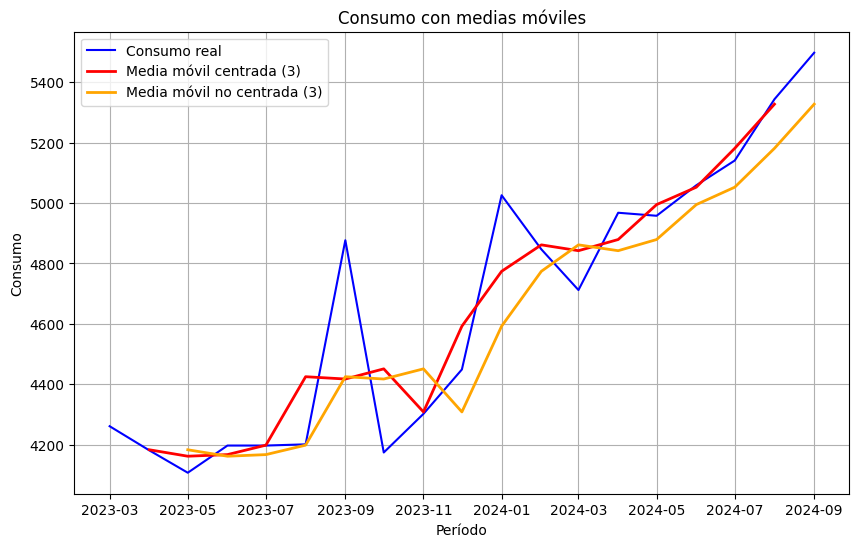

In [5]:
# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(df_1['CONSUMO'], label='Consumo real', color='blue')
plt.plot(media_centrada, label='Media móvil centrada (3)', color='red', linewidth=2)
plt.plot(media_nocentrada, label='Media móvil no centrada (3)', color='orange', linewidth=2)

plt.title("Consumo con medias móviles")
plt.xlabel("Período")
plt.ylabel("Consumo")
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [6]:
# Suavización exponencial
suavizador = SimpleExpSmoothing(df_1['CONSUMO']).fit(smoothing_level=0.75, optimized=False)
suavi_exp = suavizador.fittedvalues
forecast = suavizador.forecast(2)  # Pronosticar El mes siguiente colocamos dos para ver graficamente

# Mostrar resultados
print("Valores suavizados:\n", suavi_exp)


Valores suavizados:
 PERIODO
2023-03-01    4261.000000
2023-04-01    4261.000000
2023-05-01    4201.000000
2023-06-01    4130.500000
2023-07-01    4180.375000
2023-08-01    4192.843750
2023-09-01    4198.960938
2023-10-01    4707.490234
2023-11-01    4307.372559
2023-12-01    4303.343140
2024-01-01    4412.585785
2024-02-01    4872.646446
2024-03-01    4853.411612
2024-04-01    4747.352903
2024-05-01    4912.838226
2024-06-01    4946.709556
2024-07-01    5030.927389
2024-08-01    5113.481847
2024-09-01    5286.370462
dtype: float64


d:\TAN-S15-ST\EnvTanTsS15\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [7]:
# Imprimiendo los pronósticos para el siguiente mes
print("Pronósticos para los próximos períodos:\n", forecast)

Pronósticos para los próximos períodos:
 2024-10-01    5445.092615
2024-11-01    5445.092615
Freq: MS, dtype: float64


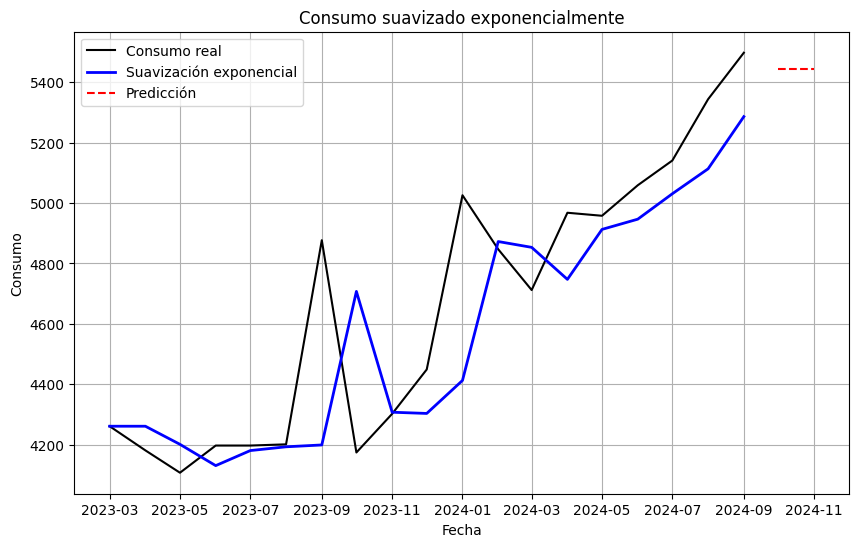

In [8]:
# Graficar
plt.figure(figsize=(10, 6))
plt.plot(df_1['CONSUMO'], label='Consumo real', color='black')
plt.plot(suavi_exp, label='Suavización exponencial', color='blue', linewidth=2)
plt.plot(forecast, label='Predicción', color='red', linestyle='--')
plt.title("Consumo suavizado exponencialmente")
plt.xlabel("Fecha")
plt.ylabel("Consumo")
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [9]:
# Variable de tiempo basada en índices
df_1['T'] = range(1, len(df_1) + 1)

# Regresión lineal
from sklearn.linear_model import LinearRegression

X = df_1[['T']]
y = df_1['CONSUMO']
modelo = LinearRegression().fit(X, y)

# Predicciones futuras
nuevos_t = pd.DataFrame({'T': [len(df_1) + 1, len(df_1) + 2, len(df_1) + 3]})
predicciones = modelo.predict(nuevos_t)

# Mostrar resultados
print("Intercepto:", modelo.intercept_)
print("Pendiente:", modelo.coef_[0])
print("Predicciones para los próximos períodos:", predicciones)


Intercepto: 3933.368421052631
Pendiente: 72.44736842105263
Predicciones para los próximos períodos: [5382.31578947 5454.76315789 5527.21052632]


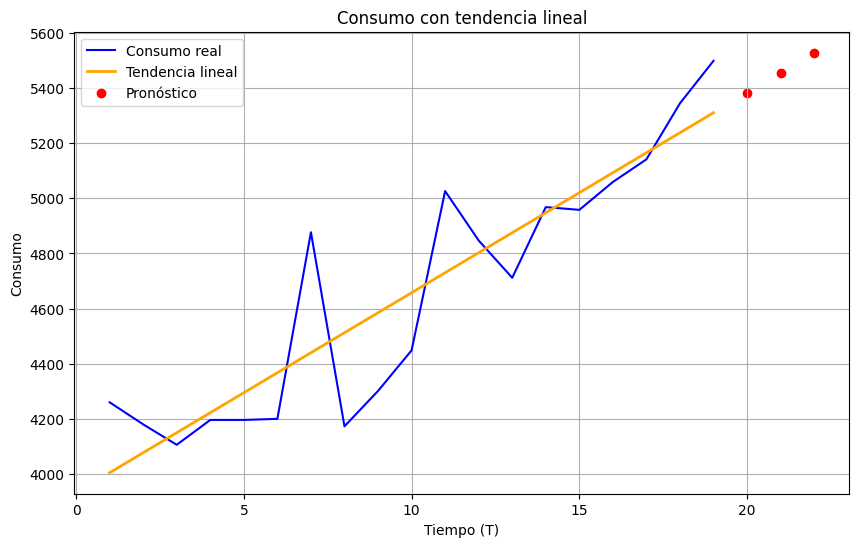

In [10]:

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(df_1['T'], y, label='Consumo real', color='blue')
plt.plot(df_1['T'], modelo.predict(X), label='Tendencia lineal', color='orange', linewidth=2)
plt.scatter(nuevos_t, predicciones, label='Pronóstico', color='red')
plt.title("Consumo con tendencia lineal")
plt.xlabel("Tiempo (T)")
plt.ylabel("Consumo")
plt.legend(loc='upper left')
plt.grid()
plt.show()

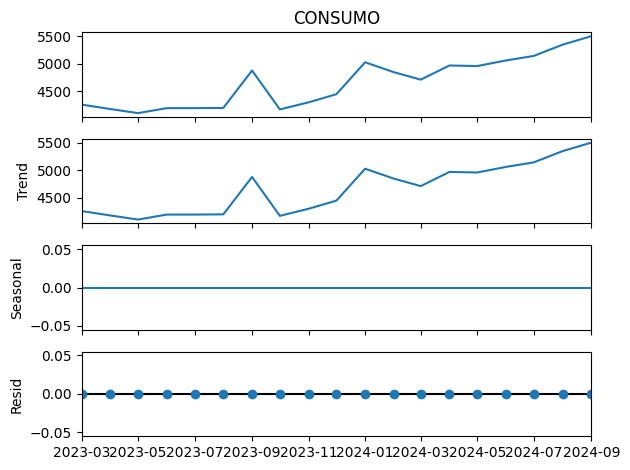

In [11]:
# Comprobamos la estacionalidad para ver si se puede trabajar a largo plazo

from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df_1['CONSUMO'],model='additive',period=1)
decompose.plot()
plt.show()